In [1]:
import torch
import torch.nn as nn
import torchviz

device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [2]:
print(device)

cuda


## 使用 PyTorch 進行簡易偏微分

In [3]:
x = torch.tensor(2.0, requires_grad=True)
y = x ** 2  # y = x^2
y.backward()  # 計算 dy/dx
print(x.grad)  # 4.0

# y = x^2 形成了一個計算圖，y.backward() 會計算 dy/dx = 2*x = 4.0

tensor(4.)


### requires_grad=False 的 tensor，PyTorch 無法計算梯度

In [4]:
x = torch.tensor(2.0, requires_grad=False)
y = x ** 2  # y = x^2
y.backward()  # 此時計算 dy/dx 會報錯
print(x.grad)  # 4.0

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

### 進行 .backward() 時，對象一定要是 scalar

In [5]:
x = torch.randn(3, requires_grad=True)
print(x)

tensor([-0.4897, -0.6702, -0.3982], requires_grad=True)


In [6]:
y = x ** 2
# y.backward() # 會報錯
y.mean().backward() # 取平均後就不會報錯
print(x.grad)

tensor([-0.3265, -0.4468, -0.2655])


### 每次進行 .backward() 後，計算圖會被清空

In [7]:
y = x ** 2
y.mean().backward(retain_graph=True) # 如果要進行第二次 .backward()，需要加上 retain_graph=True
y.mean().backward()
print(x.grad)

tensor([-0.9794, -1.3403, -0.7964])


## torchviz
- https://github.com/szagoruyko/pytorchviz

In [8]:
# 定義一個簡單的前向傳播模型
class SimpleNN(torch.nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.w1 = nn.Parameter(torch.randn(1))
        self.w2 = nn.Parameter(torch.randn(1))
        self.w3 = nn.Parameter(torch.randn(1), requires_grad=False)
        self.relu = nn.ReLU()
    
    def forward(self, x1, x2):
        u = self.w1 * x1
        v = self.w2 * x2
        z1 = u + v

        a = self.relu(z1)
        y_hat = self.w3 * a

        return y_hat

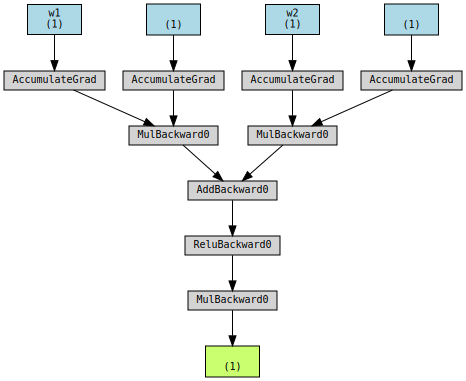

In [9]:
# 創建模型和輸入數據
model = SimpleNN()
x1 = torch.randn(1, requires_grad=True) # 隨機建立一個數字的 tensor
x2 = torch.randn(1, requires_grad=True) # 隨機建立一個數字的 tensor

# 計算前向傳播
output = model(x1, x2)

# 在此顯示
torchviz.make_dot(output, params=dict(model.named_parameters()))

In [ ]:
# 儲存 torchviz 的計算圖
dot = torchviz.make_dot(output, params=dict(model.named_parameters()))
dot.render("computational_graph", format="png")